### Workshop 01 - TF Representation

#### FFT - The Frequency Fourier Transform
Considering a time-domain ($t$) signal $g(t)$ that satisfies the Dirichlet's conditions:
1. **Bounded**: $\quad\quad\quad\quad\quad\quad\quad -\infty<g(t)<\infty$ and single-valued, $\forall t \in \mathbb{R}$
2. **Interval Divisable**: $\quad\quad\quad\quad g(t)$ is discontinued in a finite number of points
3. **Absolutely Integrable**: $\quad\quad \int_{-\infty}^{\infty} |g(t)| dt < \infty $ 

The Fourier Transform $G(f)$ of the signal $g(t)$ is defined by:

$\quad \quad G(f) = \int_{-\infty}^{\infty} g(t) \exp(-j2 \pi ft) dt$,

where $j=\sqrt{-1}$, $f$ stands for frequency and $G(f) \in \mathbb{C}$.

Conversely, a transformed signal can be recovered by:

$\quad \quad g(t) = \int_{-\infty}^{\infty} G(f) \exp(+j2 \pi ft) df$,

which stands for the Inverse FFT (IFFT).

**(Remember)** A complex number $z$ can be represented in many forms as:

$z = x +jy = r e^{j \varphi} = r (cos \varphi + j sin \varphi) $

<img src="images/wikipedia_complex_numbers.svg.png" alt="Complex Numbers" width=150px/>

##### A. Hands-On  

In [1]:
# IMPORT MODULES
import numpy as np
import scipy
import pickle
import soundfile as sf

import IPython
import matplotlib.pyplot as plt

In [2]:
# DEFINE CONSTANTS
SR = 16000
FEMALE_AUDIOPATH = "example_signals/librispeech_female84_i_am_going.wav"
MALE_AUDIOPATH = "example_signals/librispeech_male251_i_am_going.wav"

In [3]:
# TOOL FUNCTIONS
def read_wav(audio_path):
    sr, audio = scipy.io.wavfile.read(audio_path)
    return audio, sr

def write_wav(audio_path, audio, sr):
    #scipy.io.wavfile.write(audio_path, sr, audio)
    sf.write(audio_path, 0.95*audio/np.max(audio), sr)
    
def display_audio(audio_path):
    IPython.display.display(IPython.display.Audio(audio_path))

def fft_transform(audio):
    S = scipy.fft.fft(audio)
    return S

def ifft_transform(S):
    audio = scipy.fft.ifft(S)
    audio = np.real(audio) 
    return audio

def line_plot_args(args, x_norm=1, subplot=True, x_range=None, labels=["X","Y"], legend=""):
    plt.figure(figsize=(12,3))
    n_figs = len(args)
    
    for idx, arg in enumerate(args):
        xx = np.arange(len(arg)) / x_norm
        
        if x_range == None:
            x_range = [0,len(arg)]

        if subplot:
            plt.subplot(1,n_figs,idx+1);
        
        plt.plot(xx[x_range[0]:x_range[1]], arg[x_range[0]:x_range[1]]) 
        plt.xlabel(labels[0]); plt.ylabel(labels[1]); plt.grid()
    
    if not subplot:
        plt.legend(legend)

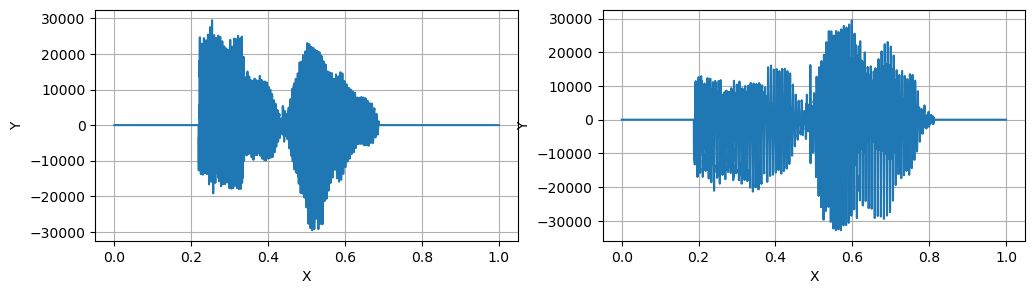

In [4]:
# READ AUDIOS
female_audio, sr = read_wav(FEMALE_AUDIOPATH)
male_audio, sr = read_wav(MALE_AUDIOPATH)

# PLOT AUDIOS
line_plot_args([female_audio, male_audio], x_norm=SR)

In [5]:
# LISTEN TO AUDIOS
display_audio(FEMALE_AUDIOPATH)
display_audio(MALE_AUDIOPATH)

In [6]:
# THE FFT
S = fft_transform(female_audio)

print("Shapes:", female_audio.shape, S.shape,"\n")

print("S values:")
print(S[:5])
print(S[-5:])

Shapes: (16000,) (16000,) 

S values:
[-94621.            -0.j          -4385.2130059 +58631.81969013j
  78556.87157975+37944.50576714j  24504.87296532-54684.22461133j
 -51772.78999896-68743.25501542j]
[-44482.44122074-51927.18150996j -51772.78999896+68743.25501542j
  24504.87296532+54684.22461133j  78556.87157975-37944.50576714j
  -4385.2130059 -58631.81969013j]


In [7]:
# THE IFFT
ifft_female_audio = ifft_transform(S)
print(ifft_female_audio)

[-2.09547579e-12  2.21189111e-12  9.31322575e-13 ...  2.09547579e-12
  6.98491931e-13  3.25962901e-12]


###### Activity 01
Considering the `male_audio` signal:
- perform the FFT 
- reconstruct the signal with the IFFT and save it to `ifft_male_audio`
- plot `male_audio` and `ifft_male_audio` signals superposed
- quantify the absolute difference

In [8]:
# Activity 01

##### B. Module and Phase 

In [9]:
# AUXILIARY FUNCTIONS
def fft_transform_abs_angle(audio):
    S = fft_transform(audio)
    return np.abs(S), np.angle(S)
    #return np.abs(S), np.unwrap(np.angle(S))

def merge_abs_ang(Sabs, Sang):
    S = Sabs*np.exp(1j * Sang)
    return S

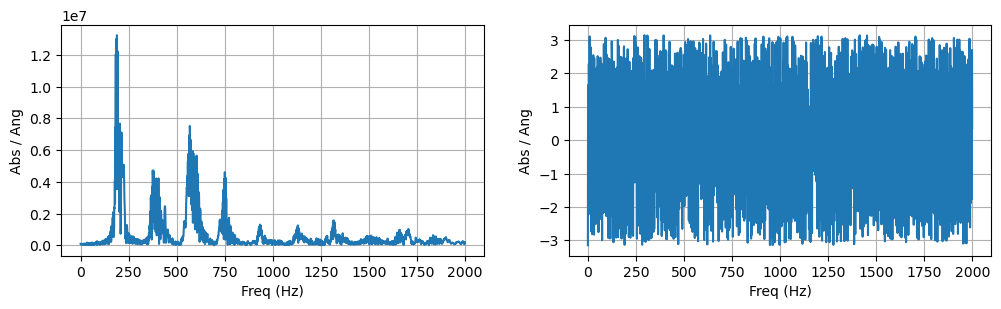

In [10]:
Sabs, Sang = fft_transform_abs_angle(female_audio)

line_plot_args([Sabs, Sang], labels=["Freq (Hz)", "Abs / Ang"], x_range=[0,2000])

###### Activity 02
Extract the FFT module ($Sabs$) for `male_audio` signal and:
- Plot both `male_audio` and `female_audio` $Sabs$ superposed
- Compare the signals. What insights can we extract? 

In [11]:
# Activity 02


##### C. Pure Tone - Simple Speech Enhancement

In [12]:
# PURE TONES EXAMPLES - NOTE 'A'
for freq in [110, 220, 440, 880, 1760, 3520]: 
    path_in = "example_signals/pure_tones/"+str(freq)+"hz.wav"
    print(path_in)
    display_audio(path_in)  

example_signals/pure_tones/110hz.wav


example_signals/pure_tones/220hz.wav


example_signals/pure_tones/440hz.wav


example_signals/pure_tones/880hz.wav


example_signals/pure_tones/1760hz.wav


example_signals/pure_tones/3520hz.wav


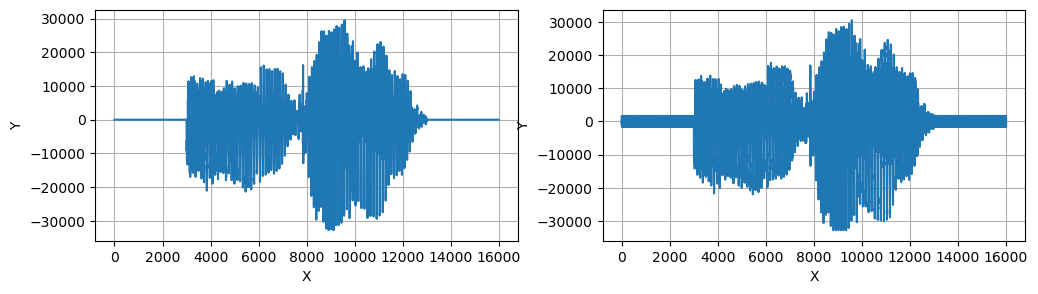

In [13]:
# ENHANCEMENT
curr_path = "example_signals/currupted_male.wav"
curr_audio, sr = read_wav(curr_path)

line_plot_args([male_audio, curr_audio])

In [14]:
display_audio(MALE_AUDIOPATH)
display_audio(curr_path)

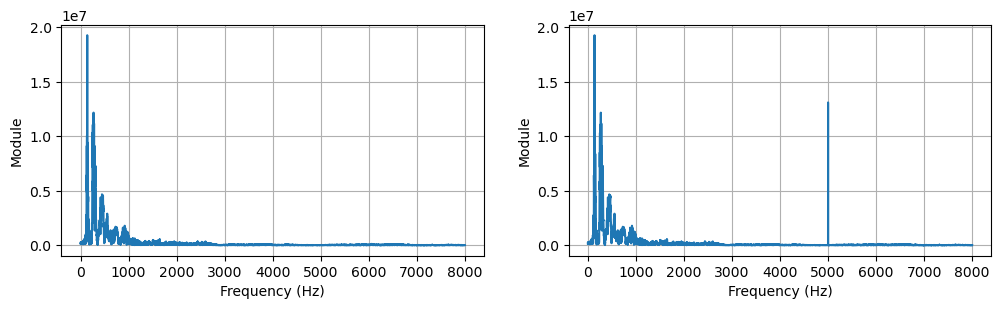

In [15]:
Sabs, Sphs = fft_transform_abs_angle(male_audio)
Sabs_curr, Sphs_curr = fft_transform_abs_angle(curr_audio)

line_plot_args([Sabs, Sabs_curr], x_range=[0,8001], labels=["Frequency (Hz)","Module"])

In [16]:
Scurr = merge_abs_ang(Sabs_curr, Sphs_curr)
curr_audio_enh = ifft_transform(Scurr)

path_enh = "enhanced_file.wav"
write_wav(path_enh, curr_audio_enh, SR)

display_audio(path_enh)

In [17]:
# plt.figure(figsize=(5,3)); plt.plot(Sabs_curr)

###### Activity 03
Remove the pure tone noise in the `example_signals/currupted_female.wav`:
- Identify where the pure tone is in $Sabs$.
- Suppress it and restore the original audio.

In [18]:
# Activity 03


In [19]:
# EXTRA: PLAYFUL TONES   :)
def gen_pure_tone(freq, SR=16000):
    pure_tone = 0.05*np.sin( (2*np.pi * freq / SR) * np.arange(2*SR) )
    return pure_tone

##### D. The Spectrogram 

In [20]:
# SIGNAL SAMPLES
time_mark = 8000        # Center of Example Audios <=> 0.5 seconds 

window_ms = (20/1000)
window_samples = int(window_ms*SR)

print("Total window samples:", window_samples)

Total window samples: 320


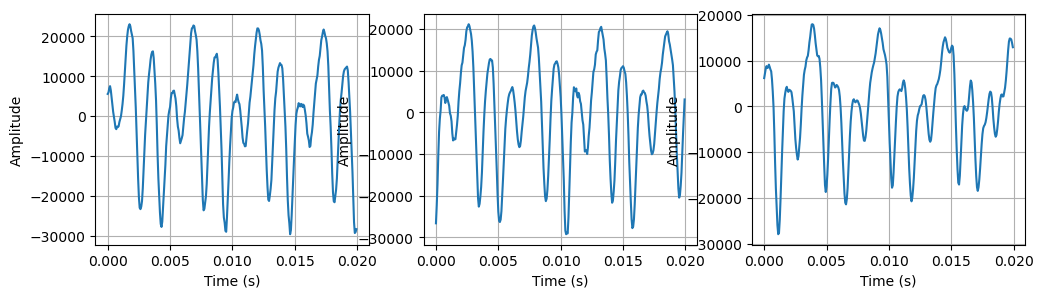

In [21]:
signal_samples = []

for shift in [0, 320, 640]:
    sample = female_audio[time_mark+shift : time_mark+shift+window_samples]
    signal_samples.append(sample)
    
line_plot_args(signal_samples, x_norm=SR, labels=["Time (s)", "Amplitude"])

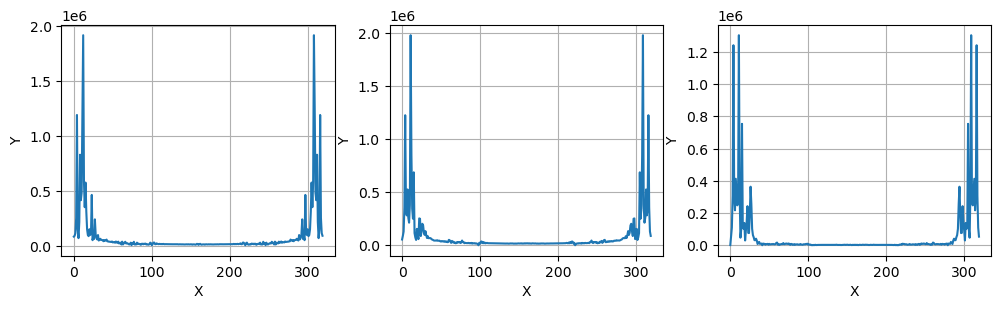

In [22]:
# SPECTRUM SAMPLES
spec_samples = []

for signal in signal_samples:
    Sabs, Sphs = fft_transform_abs_angle(signal)
    spec_samples.append(Sabs)

line_plot_args(spec_samples)
#line_plot_args(spec_samples, x_norm=window_samples/SR, x_range=[0, int(window_samples/2)])

In [23]:
# SPECTROGRAM FUNCTIONS 
def gen_spectrogram(audio, win_size=320, win_hop=160, dB=False, min_level=10 ** -8):
    Spectrogram = []
    
    start = 0
    end = win_size
    shift = win_hop
    
    while end < len(audio):
        frame = audio[start:end]
        Sframe, _ = fft_transform_abs_angle(frame)
        
        Spectrogram.append(Sframe ** 2)
        #Spectrogram.append(Sframe[:int(len(Sframe)/2 + 1)]**2)
        
        start+=shift
        end+=shift
    
    Spectrogram = np.array(Spectrogram)
    
    if dB:
        Spectrogram = 10*np.log10(Spectrogram + min_level)
    
    return Spectrogram


def matrix_plot_args(args, y_norm=1, subplot=True, x_range=None, labels=["X","Y"], legend=None, transpose=True):
    plt.figure(figsize=(12,3))
    n_figs = len(args)
    
    for idx, arg in enumerate(args):
        yy = np.arange(arg.shape[1]) / y_norm
        
        if x_range == None:
            x_range = [0,len(arg)]

        if subplot:
            plt.subplot(1,n_figs,idx+1);
        
        if transpose:
            plt.imshow(arg[x_range[0]:x_range[1]].T, aspect='auto', origin='lower')
        else:
            plt.imshow(arg[x_range[0]:x_range[1]], aspect='auto', origin='lower')
            
        plt.xlabel(labels[0]); plt.ylabel(labels[1]); plt.colorbar()
        
    if not subplot:
        plt.legend(legend)

In [24]:
female_spec = gen_spectrogram(female_audio, win_size=320, win_hop=160, dB=True)
male_spec = gen_spectrogram(male_audio, win_size=320, win_hop=160, dB=True)

print(female_spec.shape)
print(female_spec)

(98, 320)
[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]


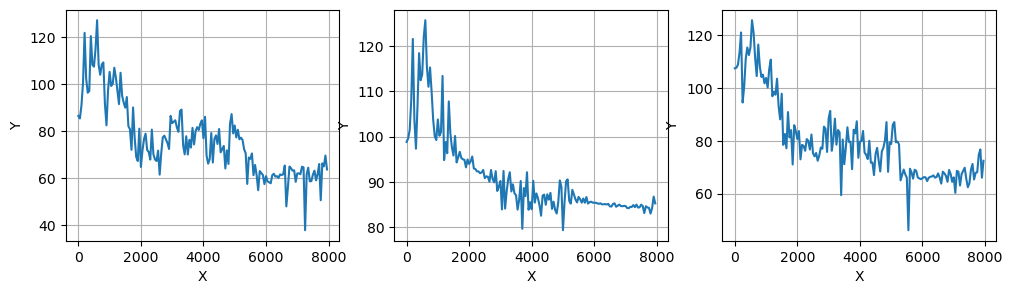

In [25]:
line_plot_args(female_spec[49:52], x_norm=window_samples/SR, x_range=[0, int(window_samples/2)])

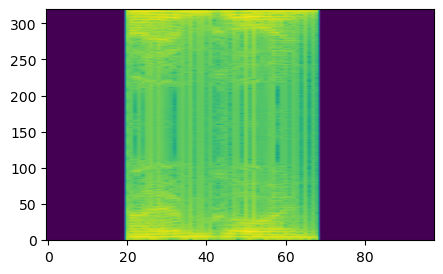

In [26]:
plt.figure(figsize=(5,3))
plt.imshow(female_spec.T, aspect='auto', origin='lower')
# plt.ylim([0, 100]); plt.colorbar()

###### Activity 04
Compare the spectrogram of female and male audios (`female_spec` , `male_spec`):
- Use `matrix_plot_args` to plot the spectrograms
- What can be observed?

In [27]:
# Activity 04


##### E. Padding a Signal 

In [28]:
def padding_zeros(audio, total_size):
    num_zeros = int(np.max([0, int(total_size - len(audio))]))
    audio = np.concatenate([audio, np.zeros(num_zeros)])
    return audio
    
    
def gen_spectrogram_complete(audio, win_size=320, win_hop=160, n_fft=512, dB=False, min_level=10 ** -8):
    Spectrogram = []
    
    start = 0
    end = win_size
    shift = win_hop
    
    while end < len(audio):
        frame = padding_zeros(audio[start:end], n_fft)
        Sframe, _ = fft_transform_abs_angle(frame)
        
        #Spectrogram.append(Sframe ** 2)
        Spectrogram.append(Sframe[:int(len(Sframe)/2 + 1)]**2)
        
        start+=shift
        end+=shift
    
    Spectrogram = np.array(Spectrogram)
    
    if dB:
        Spectrogram = 10*np.log10(Spectrogram + min_level)
    
    return Spectrogram

In [29]:
# CALC SPECTROGRAMS with PADDING
female_spec = gen_spectrogram(female_audio, win_size=320, win_hop=160, dB=True)
female_spec_complete = gen_spectrogram_complete(female_audio, win_size=320, win_hop=160, n_fft=512, dB=True)

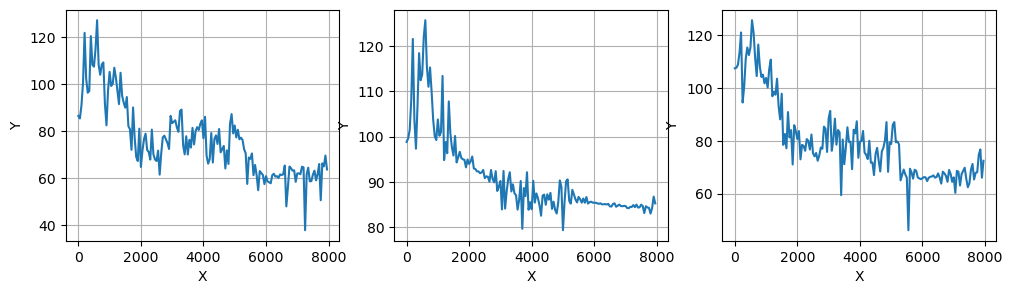

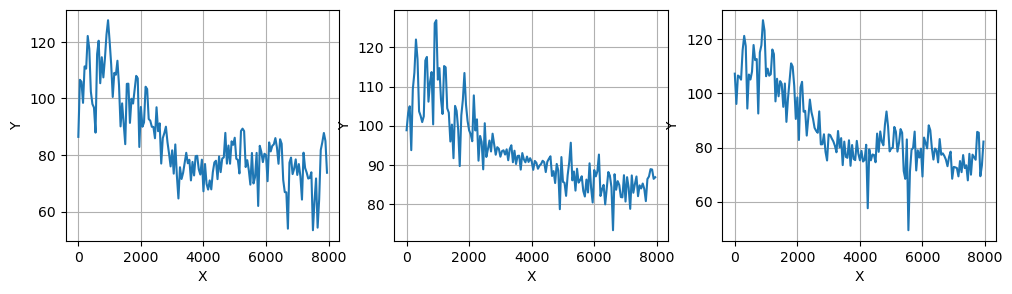

In [30]:
# PLOT SAMPLES
line_plot_args(female_spec[49:52], x_norm=window_samples/SR, x_range=[0, int(window_samples/2)])
line_plot_args(female_spec_complete[49:52], x_norm=window_samples/SR, x_range=[0, int(window_samples/2)])

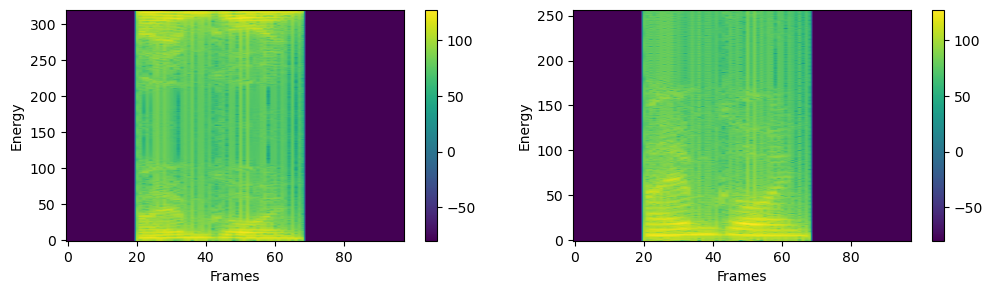

In [31]:
matrix_plot_args([female_spec, female_spec_complete], labels=["Frames", "Energy"])

##### F. Mel-Spectrogram and MFCC 
<img src="images/mel_filterbank.png" alt="Complex Numbers" />

In [32]:
# ADDITIONAL FUNCTIONS
def load_mel_filterbank(n_fft=512):
    pkl_path = "example_filters/mel_filter80_nfft"+str(n_fft)+"_sr16000.pkl"
    with open(pkl_path, "rb") as input_file:
        mel_filter = pickle.load(input_file)
    
    return mel_filter

def spec_2_melspec(S, n_fft):
    mel_filter = load_mel_filterbank(n_fft)
    mel_spec = mel_filter.dot(S.T)
    
    return mel_spec

def melspec_2_mfcc(mel_spec, n_mfcc=13):
    return scipy.fftpack.dct(mel_spec, axis=-2, type=2, norm="ortho")[:13,:]

In [33]:
female_mel_spec = spec_2_melspec(female_spec_complete, n_fft=512)
female_mfcc = melspec_2_mfcc(female_mel_spec)

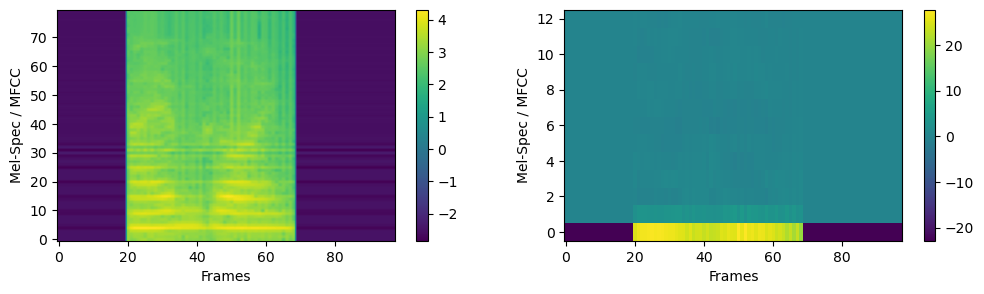

In [34]:
matrix_plot_args([female_mel_spec, female_mfcc], labels=["Frames", "Mel-Spec / MFCC"], transpose=False)

In [35]:
# MALE VERSION

###### Activity 05
Why (and when) do you think one should adopt the Mel-Spectrogram or the MFCC for a particurlar application?

##### G. Key-Word Detection (KWD)

In [36]:
kwd_paths = ["example_signals/librispeech_male251_i_am_going.wav",
             "example_signals/kwd_class2.wav",
             "example_signals/kwd_class3.wav",
             "example_signals/kwd_class5.wav"]

In [37]:
kwd_audios   = [read_wav(path) for path in kwd_paths]
kwd_specs    = [gen_spectrogram_complete(audio, n_fft=512, dB=True) for audio,_ in kwd_audios]
kwd_melspecs = [spec_2_melspec(specs, n_fft=512) for specs in kwd_specs]
kwd_mfccs    = [melspec_2_mfcc(melspec) for melspec in kwd_melspecs]

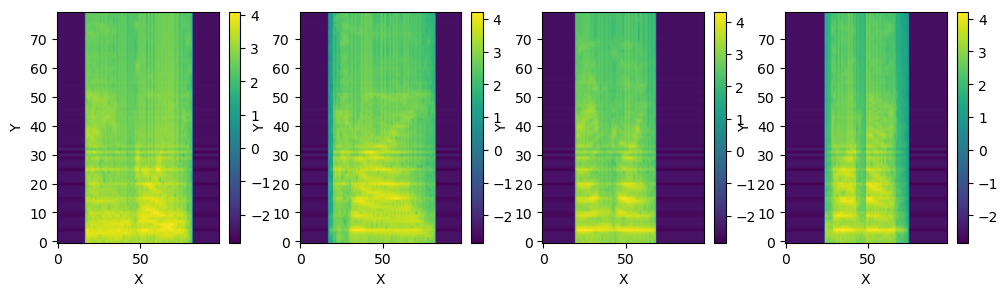

In [38]:
matrix_plot_args(kwd_melspecs, transpose=False)

In [39]:
# matrix_plot_args(kwd_mfccs, transpose=False)

###### Activity 06
Two audios above correspond to the same spoken words. Could you identify which ones?

##### H. Music Recognition (Shazam)

In [40]:
music_paths = ["example_signals/youtube_music01_ch01.wav",
              "example_signals/youtube_music02_ch01.wav"]

In [41]:
music_audios   = [read_wav(path) for path in music_paths]
music_specs    = [gen_spectrogram_complete(audio, n_fft=512, dB=True) for audio,_ in music_audios]
music_melspecs = [spec_2_melspec(specs, n_fft=512) for specs in music_specs]
music_mfccs    = [melspec_2_mfcc(melspec) for melspec in music_melspecs]

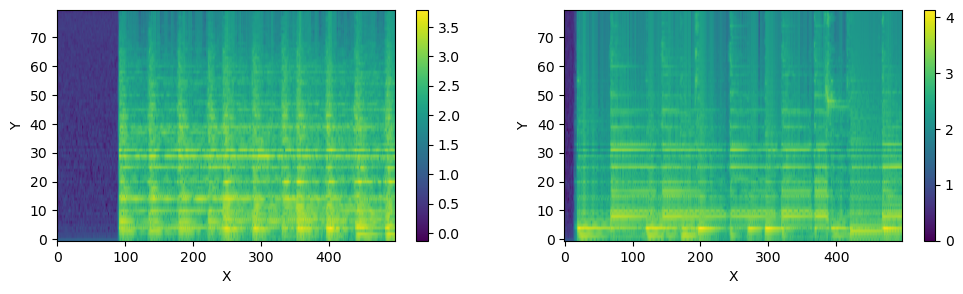

In [42]:
matrix_plot_args(music_melspecs, transpose=False)

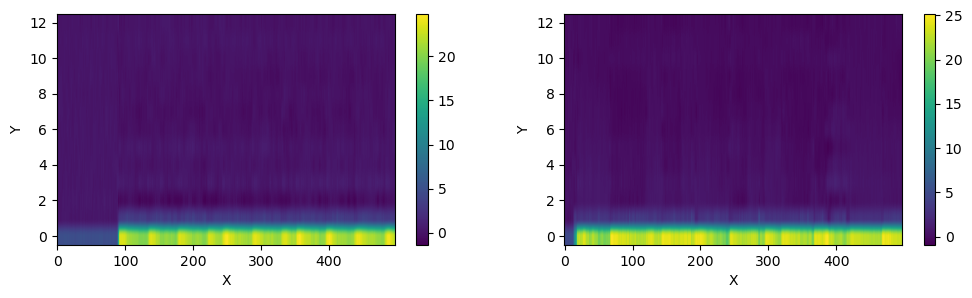

In [43]:
matrix_plot_args(music_mfccs, transpose=False)

In [44]:
display_audio(music_paths[0])
display_audio(music_paths[1])

###### Activity 07
What approach could be considered to perform music recognition using a TF Representation?

(After thinking about it, you might want to look the Shazam paper: https://www.ee.columbia.edu/~dpwe/papers/Wang03-shazam.pdf)